# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](https://course.cse.ust.hk/comp4901j/Password_Only/programs/assignment1/index.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [2]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [3]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [4]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [38]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-7, 1e-8, 1e-9]
regularization_strengths = [0.5e5, 2e5,0.5e6, 2e6, 0.5e7, 2e7]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
def accuracy(label, pred):
    return np.mean(label == pred)

for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg,
                              num_iters=1500, verbose=True)
        svm.train(X_val_feats, y_val, learning_rate=lr, reg=reg,
                              num_iters=1500, verbose=True)
        
        train_accuracy = accuracy(y_train, svm.predict(X_train_feats))
        val_accuracy = accuracy(y_val, svm.predict(X_val_feats))
        if(val_accuracy > best_val):
            best_val = val_accuracy
            best_svm = svm
        results[(lr, reg)] = (val_accuracy, best_val)
        
        print("# lr: {} # reg: {}".format(lr, reg))        
        print('# current_accuracy: {} # Best_accuracy: {}'.format(val_accuracy, best_val))
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 82.939562
iteration 100 / 1500: loss 18.902957
iteration 200 / 1500: loss 10.326744
iteration 300 / 1500: loss 9.177838
iteration 400 / 1500: loss 9.023332
iteration 500 / 1500: loss 9.002758
iteration 600 / 1500: loss 9.000095
iteration 700 / 1500: loss 8.999717
iteration 800 / 1500: loss 8.999653
iteration 900 / 1500: loss 8.999635
iteration 1000 / 1500: loss 8.999649
iteration 1100 / 1500: loss 8.999614
iteration 1200 / 1500: loss 8.999555
iteration 1300 / 1500: loss 8.999691
iteration 1400 / 1500: loss 8.999629
iteration 0 / 1500: loss 8.999567
iteration 100 / 1500: loss 8.999482
iteration 200 / 1500: loss 8.999599
iteration 300 / 1500: loss 8.999519
iteration 400 / 1500: loss 8.999589
iteration 500 / 1500: loss 8.999587
iteration 600 / 1500: loss 8.999548
iteration 700 / 1500: loss 8.999592
iteration 800 / 1500: loss 8.999662
iteration 900 / 1500: loss 8.999575
iteration 1000 / 1500: loss 8.999605
iteration 1100 / 1500: loss 8.999630
iteration 1200 / 1500:

iteration 700 / 1500: loss 10.023824
iteration 800 / 1500: loss 9.838887
iteration 900 / 1500: loss 9.685843
iteration 1000 / 1500: loss 9.562170
iteration 1100 / 1500: loss 9.460372
iteration 1200 / 1500: loss 9.375886
iteration 1300 / 1500: loss 9.307673
iteration 1400 / 1500: loss 9.252121
# lr: 1e-08 # reg: 50000.0
# current_accuracy: 0.129 # Best_accuracy: 0.487
iteration 0 / 1500: loss 316.824590
iteration 100 / 1500: loss 147.094684
iteration 200 / 1500: loss 70.953873
iteration 300 / 1500: loss 36.790722
iteration 400 / 1500: loss 21.465468
iteration 500 / 1500: loss 14.592372
iteration 600 / 1500: loss 11.508678
iteration 700 / 1500: loss 10.125557
iteration 800 / 1500: loss 9.504930
iteration 900 / 1500: loss 9.225948
iteration 1000 / 1500: loss 9.101444
iteration 1100 / 1500: loss 9.045523
iteration 1200 / 1500: loss 9.020395
iteration 1300 / 1500: loss 9.009127
iteration 1400 / 1500: loss 9.004025
iteration 0 / 1500: loss 9.001769
iteration 100 / 1500: loss 9.000713
iterati

iteration 700 / 1500: loss 61.810746
iteration 800 / 1500: loss 57.756887
iteration 900 / 1500: loss 54.003513
iteration 1000 / 1500: loss 50.551368
iteration 1100 / 1500: loss 47.349589
iteration 1200 / 1500: loss 44.399500
iteration 1300 / 1500: loss 41.682660
iteration 1400 / 1500: loss 39.162818
# lr: 1e-09 # reg: 200000.0
# current_accuracy: 0.083 # Best_accuracy: 0.488
iteration 0 / 1500: loss 751.188837
iteration 100 / 1500: loss 616.586014
iteration 200 / 1500: loss 506.388524
iteration 300 / 1500: loss 416.194740
iteration 400 / 1500: loss 342.346506
iteration 500 / 1500: loss 281.900406
iteration 600 / 1500: loss 232.400629
iteration 700 / 1500: loss 191.892979
iteration 800 / 1500: loss 158.726738
iteration 900 / 1500: loss 131.567460
iteration 1000 / 1500: loss 109.339083
iteration 1100 / 1500: loss 91.143179
iteration 1200 / 1500: loss 76.248479
iteration 1300 / 1500: loss 64.050337
iteration 1400 / 1500: loss 54.069046
iteration 0 / 1500: loss 45.897335
iteration 100 / 15

In [39]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.375


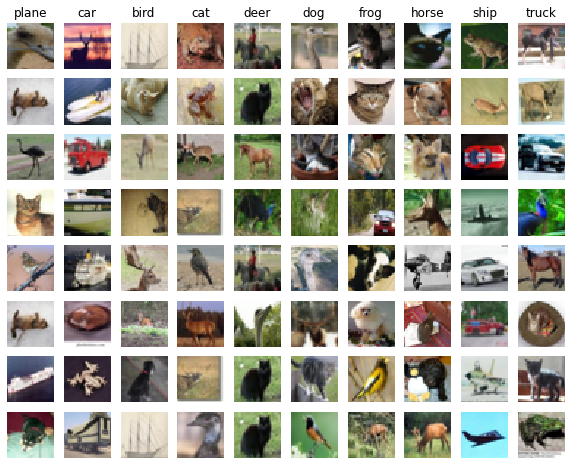

In [42]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=True)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?
***Yes, for some error cases we can understand why from a human-eye perspective. For instance, inside the ship column, many vehicles with square edges are being labeled as ship. Also some of them do not make sense from our point of view, i.e., many bird images are being classified as dog or cat. To conclude, applying HOG and color histogram is not adequate for classifying all classes of images. The HOG descriptor can efficiently classify images based on their edges and formation, yet, we did not consider the deformation of an image in this case. Moreover, the color histogram is useful when the class of images tend to have similiar colors, however it is not universal true for every type of image.***

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [43]:
print(X_train_feats.shape)

(49000, 155)


In [ ]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [ ]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!